<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lets-test-the-outputs-of-the-bServer-SIS-interface-so-i-can-come-up-with-some-better-metafunctionality" data-toc-modified-id="Lets-test-the-outputs-of-the-bServer-SIS-interface-so-i-can-come-up-with-some-better-metafunctionality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lets test the outputs of the bServer SIS interface so i can come up with some better metafunctionality</a></span></li></ul></div>

# Lets test the outputs of the bServer SIS interface so i can come up with some better metafunctionality

In [ ]:
import numpy

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import imp, time

import requests
import bServer_funcs; imp.reload(bServer_funcs)
from bServer_funcs import *

In [2]:
bServer = "http://127.0.0.1:18085/SIS/"

In [5]:
r = requests.get(bServer + "is_available")

In [11]:
r = requests.get(bServer + "get_remote_control")
r.json()

{'help': 'Get the current plot. Not sure what this actually is',
 'data': 'client in control.'}

In [12]:
cmd = 'wm th'
payload = {'spec_cmd': f"print '{cmd}';{cmd}"}
r = requests.get(bServer + "execute_command", params=payload)

g = r.json()
print(r, g['data'])

<Response [200]> 1


In [3]:
set_sis_logging(set_logging_on=True)
get_sis_logs(num_entries=2)

JSONDecodeError: Extra data: line 1 column 5 (char 4)

In [74]:
for i in range(5):
    specCommand('lup th -1 1 10 0.1', queue=True)

SPEC busy. Command Queued
SPEC busy. Command Queued
SPEC busy. Command Queued
SPEC busy. Command Queued


In [ ]:
specCommand('lup tth -1 1 10 0.1')
get_last_scan_details()

SPEC not available


In [83]:
data = get_plot_points()

In [97]:
get_current_scan_details()

'status=finished ID=checkout_191105_376 pt=11 type=33 X_lbl=tth Y_lbl=mon ctr_idx=2'

{'scan_type': 'tth',
 'scan_number': '5',
 'scan_sfx': 'checkout_191112_',
 'scan_npts': '11'}

In [121]:
scan_type = get_last_scan_details()['scan_type']
columns = [scan_type] + get_counter_mnemonics()
all_columns = columns + ['None' for _ in range(128-len(columns))]

In [122]:
data_points = get_plot_points(columns=all_columns)

In [123]:
data_points

,tth,sec,mon,det,i0,i2,fstat,normlz,A34410,kpow,...,None,None,None,None,None,None,None,None,None,None
0,69.0,0.10000000000000001,33409.0,188.0,20814.0,178.0,0.0,0.0056272261965338698,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.200000000000003,0.10000000000000001,33431.0,218.0,20825.0,177.0,0.0,0.00652089378122102,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.400000000000006,0.10000000000000001,33425.0,216.0,20819.0,176.0,0.0,0.00646222887060583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69.600000000000009,0.10000000000000001,33410.0,207.0,20814.0,177.0,0.0,0.0061957497755163104,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.799999999999997,0.10000000000000001,33405.0,177.0,20808.0,176.0,0.0,0.00529860799281545,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,70.0,0.10000000000000001,33395.0,198.0,20799.0,177.0,0.0,0.0059290312921095999,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,70.200000000000003,0.10000000000000001,33404.0,202.0,20808.0,177.0,0.0,0.0060471799784456897,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,70.400000000000006,0.10000000000000001,33425.0,227.0,20819.0,176.0,0.0,0.0067913238593866896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,70.600000000000009,0.10000000000000001,33398.0,192.0,20807.0,177.0,0.0,0.0057488472363614604,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,70.799999999999997,0.10000000000000001,33421.0,202.0,20815.0,177.0,0.0,0.0060441040064630001,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [105]:
sd = get_current_scan_details()

In [106]:
sd_ =  re.search('ID=(.*) pt', sd).group(1)

In [109]:
find_between(sd_, 'checout', '_')

'checkout'

In [57]:
import os, time

pdi_path = "P:\\bl2-1\\Dunn"
img_path = "Z:\\"

paths = [pdi_path, img_path]
filetypes = ['pdi', 'raw']

before = dict( [filetype, dict([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
               for (path, filetype) in zip(paths, filetypes) )

In [56]:
import os, time

pdi_path = "P:\\bl2-1\\Dunn"
img_path = "Z:\\"

paths = [pdi_path, img_path]
filetypes = ['pdi', 'raw']

before = dict ( [filetype, dict ([(f, None) for f in filter(os.listdir (path), f'*{filetype}')])]
               for (path, filetype) in zip(paths, filetypes) )


In [54]:
before

{'pdi': {'checkout_testing_pdi_scan2_0000.raw.pdi': None,
  'checkout_testing_pdi_scan2_0001.raw.pdi': None,
  'checkout_testing_pdi_scan2_0002.raw.pdi': None,
  'checkout_testing_pdi_scan2_0003.raw.pdi': None,
  'checkout_testing_pdi_scan2_0004.raw.pdi': None,
  'checkout_testing_pdi_scan2_0005.raw.pdi': None,
  'checkout_testing_pdi_scan2_0006.raw.pdi': None,
  'checkout_testing_pdi_scan2_0007.raw.pdi': None,
  'checkout_testing_pdi_scan2_0008.raw.pdi': None,
  'checkout_testing_pdi_scan2_0009.raw.pdi': None,
  'checkout_testing_pdi_scan3_0000.raw.pdi': None,
  'checkout_testing_pdi_scan3_0001.raw.pdi': None,
  'checkout_testing_pdi_scan3_0002.raw.pdi': None,
  'checkout_testing_pdi_scan3_0003.raw.pdi': None,
  'checkout_testing_pdi_scan3_0004.raw.pdi': None,
  'checkout_testing_pdi_scan3_0005.raw.pdi': None,
  'checkout_testing_pdi_scan3_0006.raw.pdi': None,
  'checkout_testing_pdi_scan3_0007.raw.pdi': None,
  'checkout_testing_pdi_scan3_0008.raw.pdi': None,
  'checkout_testing_pdi_

In [39]:
path = pdi_path
os.listdir(path)

['dec1794',
 'checkout_testing_pdi_scan2_0000.raw.pdi',
 'checkout_testing_pdi_scan2_0001.raw.pdi',
 'checkout_testing_pdi_scan2_0002.raw.pdi',
 'checkout_testing_pdi_scan2_0003.raw.pdi',
 'checkout_testing_pdi_scan2_0004.raw.pdi',
 'checkout_testing_pdi_scan2_0005.raw.pdi',
 'checkout_testing_pdi_scan2_0006.raw.pdi',
 'checkout_testing_pdi_scan2_0007.raw.pdi',
 'checkout_testing_pdi_scan2_0008.raw.pdi',
 'checkout_testing_pdi_scan2_0009.raw.pdi',
 'checkout_testing_pdi_scan2_0000.raw',
 'checkout_testing_pdi_scan2_0001.raw',
 'checkout_testing_pdi_scan2_0002.raw',
 'checkout_testing_pdi_scan2_0003.raw',
 'checkout_testing_pdi_scan2_0004.raw',
 'checkout_testing_pdi_scan2_0005.raw',
 'checkout_testing_pdi_scan2_0006.raw',
 'checkout_testing_pdi_scan2_0007.raw',
 'checkout_testing_pdi_scan2_0008.raw',
 'checkout_testing_pdi_scan2_0009.raw',
 'checkout_testing_pdi_scan3_0000.raw.pdi',
 'checkout_testing_pdi_scan3_0001.raw.pdi',
 'checkout_testing_pdi_scan3_0002.raw.pdi',
 'checkout_testi

In [43]:
filetype = '.pdi'
filter(os.listdir(pdi_path), f'*{filetype}')

['checkout_testing_pdi_scan2_0000.raw.pdi',
 'checkout_testing_pdi_scan2_0001.raw.pdi',
 'checkout_testing_pdi_scan2_0002.raw.pdi',
 'checkout_testing_pdi_scan2_0003.raw.pdi',
 'checkout_testing_pdi_scan2_0004.raw.pdi',
 'checkout_testing_pdi_scan2_0005.raw.pdi',
 'checkout_testing_pdi_scan2_0006.raw.pdi',
 'checkout_testing_pdi_scan2_0007.raw.pdi',
 'checkout_testing_pdi_scan2_0008.raw.pdi',
 'checkout_testing_pdi_scan2_0009.raw.pdi',
 'checkout_testing_pdi_scan3_0000.raw.pdi',
 'checkout_testing_pdi_scan3_0001.raw.pdi',
 'checkout_testing_pdi_scan3_0002.raw.pdi',
 'checkout_testing_pdi_scan3_0003.raw.pdi',
 'checkout_testing_pdi_scan3_0004.raw.pdi',
 'checkout_testing_pdi_scan3_0005.raw.pdi',
 'checkout_testing_pdi_scan3_0006.raw.pdi',
 'checkout_testing_pdi_scan3_0007.raw.pdi',
 'checkout_testing_pdi_scan3_0008.raw.pdi',
 'checkout_testing_pdi_scan3_0009.raw.pdi',
 'checkout_testing_pdi_again_scan1_0000.raw.pdi',
 'checkout_testing_pdi_again_scan1_0001.raw.pdi',
 'checkout_testing_p

In [41]:
filter?

In [30]:
import re

rx = re.compile(r'\.pdi')

#print(next(filter(rx.search, os.listdir(folder))))
r = []

now = int(time.time())
for path, dnames, fnames in os.walk(folder):

    r.extend([os.path.join(path, x) for x in fnames if (now - int(os.path.getmtime(os.path.join(path, x))))/(60*60) ])

print(r)


KeyboardInterrupt: 

In [24]:
def walk_dirs(folder):
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]
    for sf in subfolders
    for 

In [18]:
wk = os.walk(folder)

In [21]:
next(wk)

('P:\\bl2-1\\dec963\\b_toney',
 [],
 ['b_toney_201704_17-17_scan1_0000.raw',
  'b_toney_201704_17-17_scan1_0001.raw',
  'b_toney_201704_17-17_scan1_0002.raw',
  'b_toney_201704_17-17_scan1_0003.raw',
  'b_toney_201704_17-17_scan1_0004.raw',
  'b_toney_201704_17-17_scan1_0005.raw',
  'b_toney_201704_17-17_scan1_0006.raw',
  'b_toney_201704_17-17_scan1_0007.raw',
  'b_toney_201704_17-17_scan1_0008.raw',
  'b_toney_201704_17-17_scan1_0009.raw',
  'b_toney_201704_17-17_scan1_0010.raw',
  'b_toney_201704_17-17_scan1_0011.raw',
  'b_toney_201704_17-17_scan1_0012.raw',
  'b_toney_201704_17-17_scan1_0013.raw',
  'b_toney_201704_17-17_scan1_0014.raw',
  'b_toney_201704_17-17_scan1_0015.raw',
  'b_toney_201704_17-17_scan1_0016.raw',
  'b_toney_201704_17-17_scan1_0017.raw',
  'b_toney_201704_17-17_scan1_0018.raw',
  'b_toney_201704_17-17_scan1_0019.raw',
  'b_toney_201704_17-17_scan1_0020.raw',
  'b_toney_201704_17-17_scan1_0021.raw',
  'b_toney_201704_17-17_scan1_0022.raw',
  'b_toney_201704_17-

In [8]:
if (len(last_line) != 1) or ('command' not in last_line) or ('reply' not in last_line):
    print('n')

n


<IPython.core.display.Javascript object>


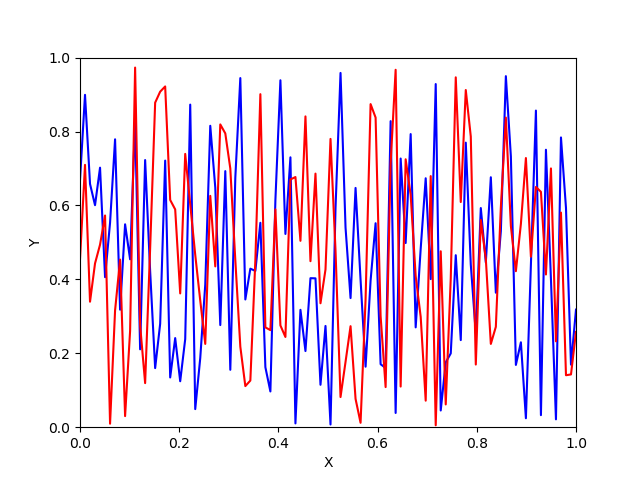

In [4]:
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [7]:
specCommand('lup tth -1 1 20 0.01')

scan_running = True
while scan_running:
    scan_details = get_current_scan_details()
    scan_status = re.search('status=(.*) ID', scan_details).group(1)
    if scan_status == 'finished':
        scan_running = False
        print('done')

    data = get_plot_points()

JSONDecodeError: Extra data: line 1 column 5 (char 4)

In [39]:
fig, ax = plt.subplots()

while True:
    scan_details = get_current_scan_details()
    scan_status = re.search('status=(.*) ID', scan_details).group(1)
    
    while scan_status == 'started':
        scan_details = get_current_scan_details()
        scan_status = re.search('status=(.*) ID', scan_details).group(1)

        data = get_plot_points()
        ax.cla()
        ax.plot(data[0], data[1])
        
    time.sleep(1)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,69.0,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.100000000000009,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.200000000000003,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69.299999999999997,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.400000000000006,0.01,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,69.5,0.01,0.0,0.0,2.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,69.600000000000009,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,69.700000000000003,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,69.799999999999997,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,69.900000000000006,0.01,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
data = get_plot_points()
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,69.0,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69.100000000000009,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.200000000000003,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69.299999999999997,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69.400000000000006,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,69.5,0.01,1.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,69.600000000000009,0.01,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,69.700000000000003,0.01,1.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,69.799999999999997,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,69.900000000000006,0.01,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
get_current_scan_details()

'status=finished ID=checkout_191105_21 pt=21 type=33 X_lbl=tth Y_lbl=mon ctr_idx=2'

In [24]:
get_sis_logs()

["Tue Nov  5 18:19:40 2019: command: print 'lup th -1 1 20 0.01'; lup th -1 1 20 0.01",
 'Tue Nov  5 18:19:46 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:01:47 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:01:53 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:16:29 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:16:36 2019:    L-- OK, reply: 1',
 "Tue Nov  5 19:16:39 2019: command: print 'lup tth -1 1 20 0.01';lup tth -1 1 20 0.01",
 'Tue Nov  5 19:16:46 2019:    L-- OK, reply: 1']